In [154]:

import tensorflow as tf
import os
from os import listdir
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imageio
from keras.utils import to_categorical
model_class = tf.keras.models.load_model('C:\\Users\\Gilbert\\Documents\\PhD workshe\\Applications Developments\\age_detect\\afrinet-cnn-class.h5',compile=False)
model_reg = tf.keras.models.load_model('C:\\Users\\Gilbert\\Documents\\PhD workshe\\Applications Developments\\age_detect\\afrinet-cnn-reg.h5',compile=False)
model_reg_comb = tf.keras.models.load_model('C:\\Users\\Gilbert\\Documents\\PhD workshe\\Applications Developments\\age_detect\\afrinet-cnn-comb.h5',compile=False)

# changing dir and loading images in the folder

#filepath = "C:\\Users\\Gilbert\\Documents\\PhD workshe\\Zaria Data Set\\Zaria Data Set"
filepath = "C:\\Users\\Gilbert\\Documents\\PhD workshe\\Zaria Data Set\\Combined"
os.chdir(filepath)

onlyfiles = list(set(os.listdir())-{'desktop.ini'})
len(onlyfiles)





283

283
23: 36
23 : 1
24: 23
25: 13
22: 23
19: 31
26: 4
20: 45
18: 38
16: 9
21: 24
15: 8
17: 24
27: 4


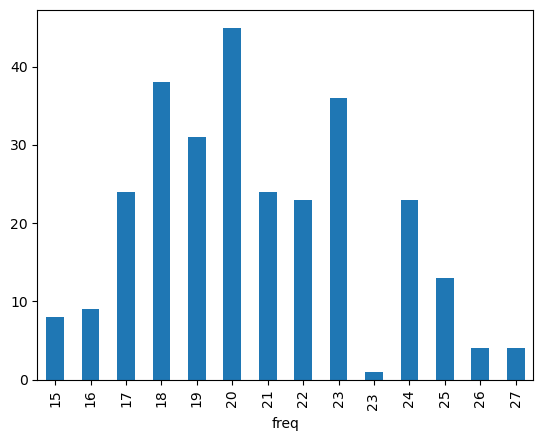

,freq
0,23
1,23
2,23
3,24
4,25


In [155]:
shuffle(onlyfiles)
ages = [i.split('_')[0] for i in onlyfiles]
print (len(ages))

elements_count = {}
# iterating over the elements for frequency
for element in ages:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

import pandas as pd

df = pd.DataFrame({'freq': ages})
df.groupby('freq', as_index=True).size().plot(kind='bar')
plt.show()
df.head()

In [156]:
filepaths = pd.Series(onlyfiles, name='Filepath').astype(str)
ages = pd.Series(ages, name='Age').astype(np.int32)

images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

Age: 18


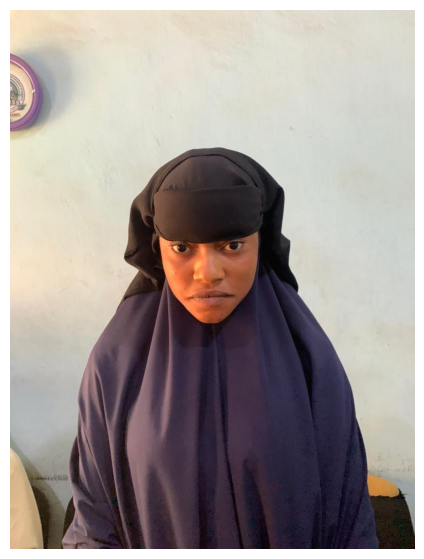

In [157]:
df_age = pd.DataFrame({'Ages': ages})
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)

#choose an image id to see its age
image_id = 1
image_example_path = images.iloc[image_id].Filepath
age = images.iloc[image_id].Age

print(f'Age: {age}')
image = cv2.imread(image_example_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

In [158]:

classes = []
for i in ages:
  if(i!="model.png"):
      i = int(i)
      
      if (i>=15) and (i<=17):
          classes.append(0)
      if (i>=18) and (i<=25):
          classes.append(1)
      if (i>=26) and (i<=30):
          classes.append(2)
            
            
classes[:3]

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels.shape

(283, 3)

In [159]:

X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      img=imageio.imread(file,pilmode="RGB")
      img =cv2.resize(img, (224,224))
      X_data.append(img)



X = np.squeeze(X_data)
X.shape


# normalize data
X = X.astype('float32')
X /= 255

C:\Users\Gilbert\AppData\Local\Temp\ipykernel_12320\3494566904.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(file,pilmode="RGB")


In [160]:
agelabel=np.array(ages)

agelabel[3]

24

In [161]:
yhat = model_reg.predict(X)
true_ages=ages



from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat)
print ("The MAE",mae)

rmse = np.sqrt(mse)

print ("this is the rmse",rmse )
from sklearn.metrics import r2_score
r2 = r2_score(true_ages,yhat )
print("Test R^2 Score: {:.5f}".format(r2))


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 604ms/step
The MSE 13.118364591770954
The MAE 2.66264623635228
this is the rmse 3.6219282974364573
Test R^2 Score: -0.71827


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 566ms/step
The MSE 14.34906398069662
The MAE 2.952121384152254
this is the rmse 3.788015836912066
Test R^2 Score: -0.87947
[[ 10  28   3]
 [  8 188  38]
 [  0   2   6]]
(283, 3)


<Axes: >

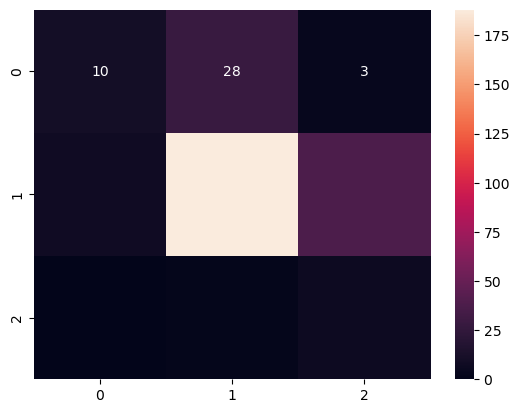

In [167]:
yhat1, yhat2 = model_reg_comb.predict(X)


from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat1)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat1)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )



r2 = r2_score(true_ages, yhat1)
print("Test R^2 Score: {:.5f}".format(r2))




y_pred=np.argmax(yhat2, axis=1)
y_test=np.argmax(true_ages_class, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat2.shape)

import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 481ms/step
[[ 12  29   0]
 [ 15 202  17]
 [  0   4   4]]
(283, 3)


<Axes: >

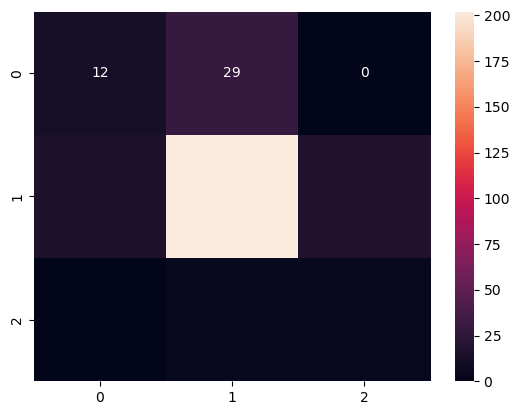

In [165]:
from sklearn.metrics import classification_report, confusion_matrix

yhat = model_class.predict(X)
true_ages_class = categorical_labels

y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(true_ages_class, axis=1)
cm_class = confusion_matrix(y_test, y_pred)
print(cm_class)
print(yhat.shape)
import seaborn as sns
sns.heatmap(cm_class, fmt="d", annot=True)

In [146]:
from sklearn.metrics import classification_report

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(true_ages_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)


              precision    recall  f1-score   support

           0       0.44      0.29      0.35        42
           1       0.86      0.86      0.86       234
           2       0.19      0.50      0.28         8

    accuracy                           0.77       284
   macro avg       0.50      0.55      0.49       284
weighted avg       0.78      0.77      0.77       284



In [168]:
from sklearn.metrics import classification_report

predicted_classes = np.argmax(yhat2, axis=1)
true_classes = np.argmax(true_ages_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)


              precision    recall  f1-score   support

           0       0.56      0.24      0.34        41
           1       0.86      0.80      0.83       234
           2       0.13      0.75      0.22         8

    accuracy                           0.72       283
   macro avg       0.52      0.60      0.46       283
weighted avg       0.80      0.72      0.74       283



<Axes: xlabel='Age'>

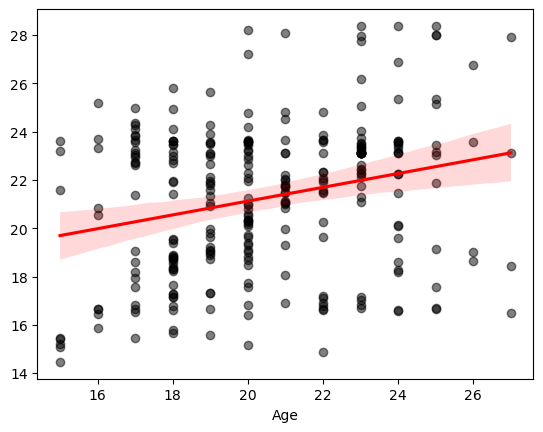

In [148]:
import seaborn as sns

sns.regplot(x = true_ages, y = yhat,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99) # 99% level

In [149]:
import statsmodels.api as sm
model = sm.OLS(true_ages ,yhat)
results = model.fit()
print (results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Age   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              9784.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):                   1.59e-221
Time:                        21:16:24   Log-Likelihood:                         -755.70
No. Observations:                 284   AIC:                                      1513.
Df Residuals:                     283   BIC:                                      1517.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [169]:
import statsmodels.api as sm
model = sm.OLS(true_ages ,yhat1)
results = model.fit()
print (results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Age   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.135e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):                   8.03e-230
Time:                        22:03:57   Log-Likelihood:                         -732.24
No. Observations:                 283   AIC:                                      1466.
Df Residuals:                     282   BIC:                                      1470.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<Axes: xlabel='Age'>

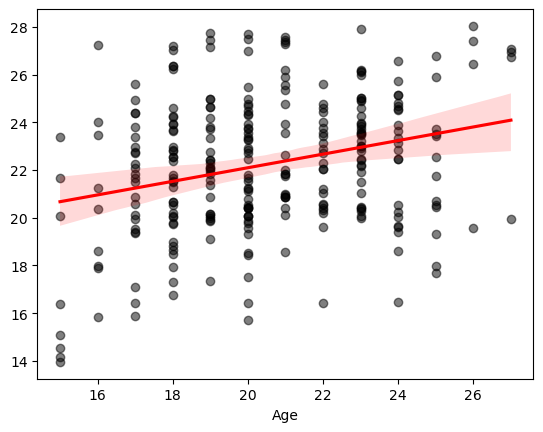

In [172]:
import seaborn as sns

sns.regplot(x = true_ages, y = yhat1,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99) # 99% level